## Skating Score Project

### Introduction: 

   Historically, figure skating has been a sport inwhich the United States has greatly excelled in the Olympic Winter Games. Sports that are judged on both technical merit and artisitc expression are challenging to judge objectively and figure skating is no exception. In 2004, the previous highly subjective figure skating scoring system was replaced with the International Judging System(IJS) which takes into account the minutiae of every skating program awarding a specific point value based on multiple calculations. Following this change, the United States has seen a drastic decrease in international accomplishment for women skaters representing the USA. 

   The recently 2022 Olympic winter games in Beijing marks 4 consecutive Olympics inwhich the US women have not been awarded a medal. Many critics of current state of international figure skating suggest that the medal drought is directly related to Russian domianance in womens figure skating. Russian figure skating has been under scrutiny for their questionable training tactics and with a recently doping scandal at the 2022 Beijing Olympics, it's more than reasonable for all other skating federations to reject Russian figure skating training tactics and put the wellbeing of athletes ahead of competitive victories However, can the 15 year medal drought be completed contributed to this? 

   In the four most recent Winter Olympic Games, at least one of the women figure skating medals has gone to an athlete from Japan, South Korea, Italy, or Canada. It's also worth noting that the United States is continuing to excel greatly in most figure skating disciplines (especially mens and ice dancing). This project is a data-driven alaysis of this project inwhich I explore trends that may offer insights to improve US womens figure skating scores at the Olympic Games. 

### Project Goals:

- Construct a machine learning regression model that improves predicted Olympic scores of women figure skaters under the International Judging System (implemented in 2004).
- Find the key drivers of Olympic event scores by anaylizing competition data of athletes prior to their Olympic performances.
- Empower US figure skating athletes and coaches with information that may lead to positive training modifications.
- Thoroughly document the process and key findings.
- Prove the potentiality of utilizing the data science pipeline to better the sport of figure skating.

### Summary of Findings & Recommendations:
- My analysis indicates that the top drivers of tax assessed home values are:
     > - property size (square footage)
     > - property's year built
     > - bedroom count
     > - bathroom count

- I built and trained a Polynomial Regression model which is able to improve predicted tax assessed home values by ~ $80,000 (22% improved from baseline/previous predictions).
 
- By utilizing this model with the top drivers of tax assessed home values , I can recommend employing this new model with reasonable confidence.

### Data Acquisition & Preparation
- Import necessary libraries
- Import user defined functions (acquire.py, wrangle.py)
- Data imported meets the following conditions:
    > - Single family homes in Orange county, CA, Ventura, CA, or Los Angeles, CA
    > - Had a transaction in 2017
    > - Data available in zillow properties_2017 table

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import acquire
import prepare
import explore
import os
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from math import sqrt
from scipy import stats

import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 300)
pd.options.display.max_seq_items = 2000

from IPython.display import Markdown, display
from IPython.core import display as ICD
import textwrap
import ipywidgets as widgets
from traitlets import Unicode, Dict
from pandas_profiling import ProfileReport
from IPython.core import display as ICD

np.random.seed(123)

In [2]:
df = acquire.get_competition_data()
# this is a user-defined function in acquire.py that pulls in selected data from skatingscores.com

In [3]:
df.info()
# shows a snapshot of all data/columns that may potentially be used prior to data wrangling.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860 entries, 0 to 1859
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1860 non-null   int64  
 1   Skater       1860 non-null   object 
 2   Nat_x        1860 non-null   object 
 3   SP           1103 non-null   object 
 4   SP.1         1860 non-null   float64
 5   SP.2         1860 non-null   float64
 6   FS           1065 non-null   object 
 7   FS.1         1858 non-null   float64
 8   FS.2         1858 non-null   float64
 9   Total        1085 non-null   object 
 10  Total.1      1860 non-null   object 
 11  season_x     1860 non-null   int64  
 12  skater_name  1860 non-null   object 
 13  first_name   1860 non-null   object 
 14  #_x          1860 non-null   float64
 15  Nat_y        1860 non-null   object 
 16  Combo Jump   1860 non-null   object 
 17  Solo Jump    1859 non-null   object 
 18  Axel         1860 non-null   object 
 19  TES_x 

### Initial Data - 
I strategically acquired data on international-level women figure skaters over since 2004. In the next steps, I will label columns much more clearly so those without specific domain knowledge will be able understand this anaylsis much easier. TES, PCS, TSS, etc. are abbreviated parts of the skating score and as I acquired and joined the data together, we can see that there are many duplicate columns. Because the target variable is athletes' final Olympic score ("oly_event_score"), I am filtering out all records that do no belong to an Olympian. After this, there are 102 total records. One record represents a skater's olympic results from one of the five Winter Olympic Games between 2006-2022 and information about that skater's international competitive history the 4 years preceding said Olympics. It's important to note that there will be duplicate skater names in the database as some skaters have performed at more than one Olympics. 

Only major international events are included at this time as these are likely to be the most representive of how a skater may perform at the Olympics considering the high pressure environment. It is certainly possible to expand on this exploration and modeling process in the future by adding skaters' scores from national level competitions and additional international events. 

In [3]:
df = prepare.prepare_competition_data(df)
#user-defined function which wrangles and cleans data optimally for this project

In [ ]:
df.info()
#displays overview of the prepared dataframe 

### Profile Report

- This profile report is an in-depth analysis of all variables included in the dataframe. This is included to offer full transparency of the project data and process. 

In [7]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_widgets()
#generates a profile report and embeds the report as widgets for an interactive user experience

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

<script src=\"img/profile.html\" width=800 height=800 />

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>


### In this project, events included are:

- Grand Prix Qualifiers (America, Canada, France, Japan, Russia, China)
- Grand Prix Final
- World Championships (because the World Championships take place after the Olympics in a given season, the world championship scores are included as taking place the season after they do. 
- Olympic Winter Games (specific competition data is included for the exploratory process only. The goal of modeling in this project is to predict Olympic scores based on competitive history so all Olympic data aside from the target variable will be dropped pre-modeling).

### Non-Olympic scores in the 4 year period preceding the Olympics have been averaged together for each record in the following categories:

- short program/free program/final event place
- short program/free program/final event score
- short program/free program/final components score
- short program/free program/final elements score
- average errors including deductions(falls and/or major error), under rotation jump error, costly jump error, major combination jump error, jump downgrade, illegal element, suspected errors, and all jump errors
- average difficult jumping elements including quads, triple axels, and triple triple (note- this accounts for attempted jumps only)

### Splitting Data

Splitting data into 3 subsets (train, validate, test) for proper statistical analysis, exploration, modeling, and assessment.
- Train: explore features and relationships to target variable, statistical analysis, build models 
- Validate: evaluate model performance compared to the train dataset, Assess potential overfitting
- Test: run only the chosen top performing to ensure model performs as expected on unseen data before employing

In [4]:
train, validate, test = prepare.split_data(df)
# Function that plits data into 3 subsets: train, validate, test. Random state specifying that data is split
# with the exact same records when the code is re-run (useful for exploration and modeling, yet
# I suggest dropping this when employing the model)

**number of train records: 56**

**number of validate records: 25**

**number of test records: 21**

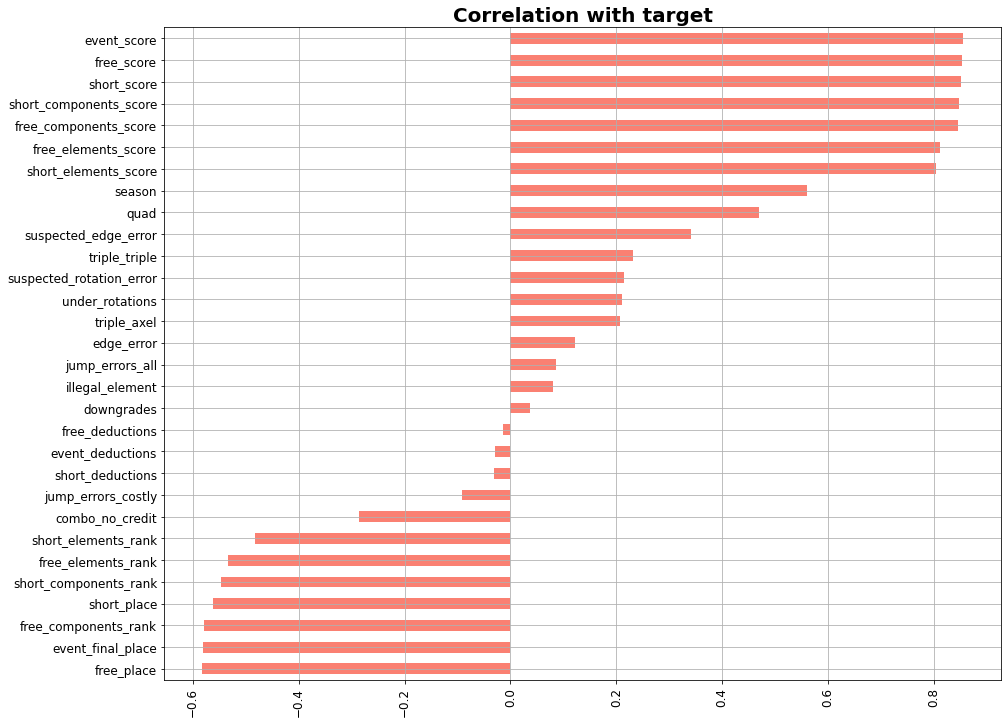

In [5]:
plt.title("Feature Correlation (contiuous variables) to event score")
train.drop(['oly_event_final_place', 'oly_short_score', 'oly_short_elements_score', 'oly_short_components_score', 'oly_free_elements_score', 'oly_free_components_score', 'oly_free_score', 'oly_event_score'], axis=1).corrwith(train['oly_event_score'], method='pearson').sort_values().plot(kind='barh', grid=True, figsize=(15,12), color='salmon')
plt.title("Correlation with target", fontweight='bold', size=20)
plt.xticks(size=12, rotation=90)
plt.yticks(size=12)
plt.show()
# graphs the correlation strength of features to the target variable

Interestingly, most jumping errors do not seem to be highly correlated with Olympic scores. While further analysis is needed, it's possible that taking technical risks could pay off. Actually, suspected errors are positively correlated with Olympic scores. Suspected errors do not include a mandatory deduction, but I'm very curious why we'd see a any positive correlation here. Based on this graph, the only specific jumping attribute that shows a useful correlation to Olympic scores is average quad attempts. Very few women figure skaters have attemped quads in international competition and those that have attempted them have tended to be very technically advanced skaters so this correlation is not surprising. If anything, I'd expect the correlation to be higher. The triple axel is another jump that only a handful of advanced women skaters attempt and/or complete so it's surprising that there's such a weak correlation with Olympic scores. However, as mentioned, the advanced jump columns take attempts and not necessarily successful completion into account so it's probable that the correlation would look different if looking at these jumps landed cleanly only. Breaking these features down further in such ways is very possible with advanced (and more timely) data wrangling which I plan on pursuing shortly.

In [6]:
train["top"] = train["country"].apply(lambda country: explore.top_score(country))
#uses pre-defined user function to create a column specifying if the record/skater is from a the USA, a country that
#has medaled in Womens Figure Skating Olympics since 2006, or all other countries
train["usa"] = train["country"].apply(lambda country: explore.usa_score(country))
#uses pre-defined user function to create a column specifying if the record/skater is from a the USA or not

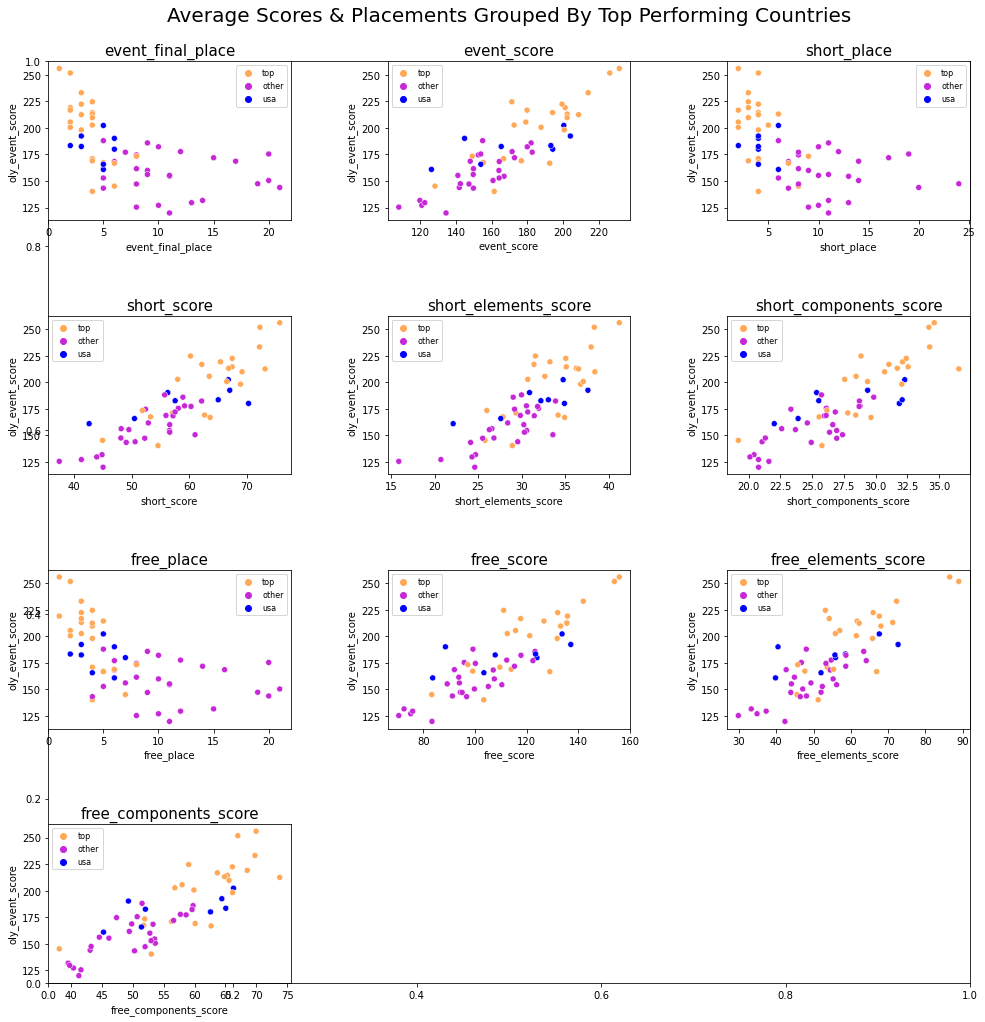

In [12]:
X1 = train[['event_final_place', 'event_score', 'short_place', 'short_score', 'short_elements_score',  'short_components_score', 'free_place', 'free_score', 'free_elements_score', 'free_components_score']]
#creates df of Average Scores & Placements
fig = plt.figure(1, figsize=(16,16))
plt.title('Average Scores & Placements Grouped By Top Performing Countries', size=20, pad=40)
for i, col in enumerate(X1.columns, 1): #loops through columns in df to plot said columns with target variable
    fig.add_subplot(4,3,i)
    sns.scatterplot(x=col, y='oly_event_score', data=train, hue='top', palette='gnuplot2_r')
    plt.legend(fontsize=8, loc='best')
    plt.title(col, size=15)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)

plt.rcParams["axes.grid"] = False
plt.show(1)

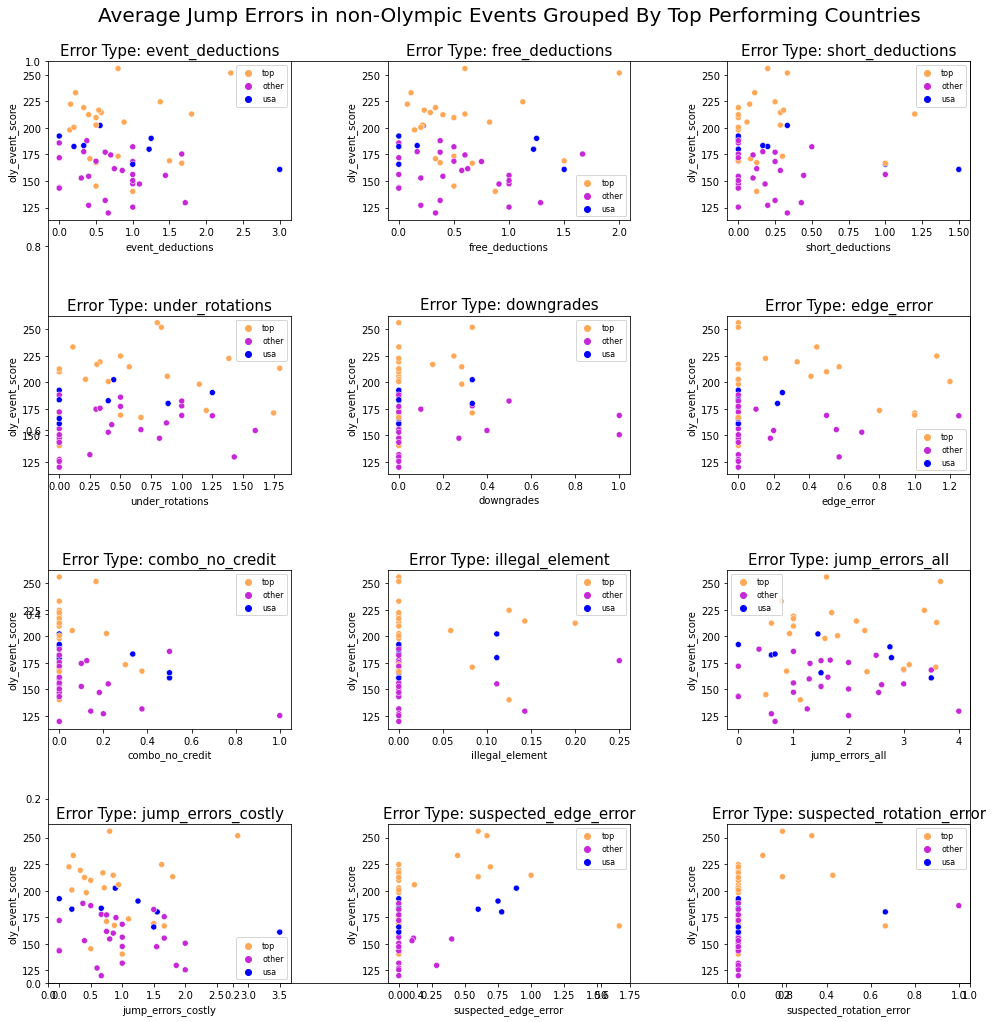

In [13]:
X2 = train[['event_deductions', 'free_deductions', 'short_deductions', 'under_rotations', 'downgrades', 'edge_error', 'combo_no_credit', 'illegal_element', 'jump_errors_all', 'jump_errors_costly', 'suspected_edge_error', 'suspected_rotation_error']]
#creates df of Average Jump Errors in non-Olympic Events
fig = plt.figure(1, figsize=(16,16))
plt.title('Average Jump Errors in non-Olympic Events Grouped By Top Performing Countries', size=20, pad=40)
for i, col in enumerate(X2.columns, 1):  #loops through columns in df to plot said columns with target variable
    fig.add_subplot(4,3,i)
    sns.scatterplot(x=col, y='oly_event_score', data=train, hue='top', palette='gnuplot2_r')
    plt.legend(fontsize=8, loc='best')
    plt.title('Error Type: ' + col, size=15)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)

plt.rcParams["axes.grid"] = False
fig.show()

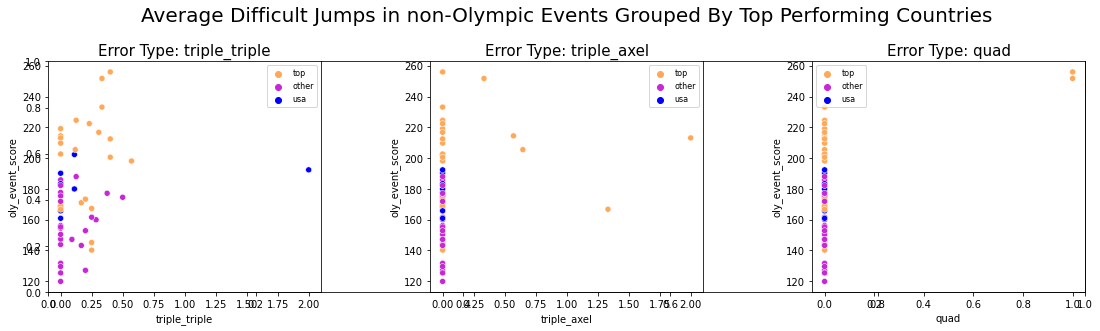

In [19]:
X3 = train[['triple_triple', 'triple_axel', 'quad']]
#creates df of Average Difficult Jumps in non-Olympic Events
fig = plt.figure(1, figsize=(18,4))
plt.title('Average Difficult Jumps in non-Olympic Events Grouped By Top Performing Countries', size=20, pad=40)
for i, col in enumerate(X3.columns, 1): #loops through columns in df to plot said columns with target variable
    fig.add_subplot(1,3,i)
    sns.scatterplot(x=col, y='oly_event_score', data=train, hue='top', palette='gnuplot2_r')
    plt.legend(fontsize=8, loc='best')
    plt.title('Error Type: ' + col, size=15)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)

plt.rcParams["axes.grid"] = False
fig.show()

In [7]:
explore.scores_season(train)

**Mean Event Scores by Season**

,short_score,short_elements_score,short_components_score,free_score,free_elements_score,free_components_score,event_score
season,,,,,,,
2006,48.38,25.21,23.57,92.35,45.23,47.57,143.74
2010,53.89,29.06,24.79,96.03,46.90,49.59,151.43
2014,57.21,30.46,26.87,107.87,53.60,54.90,165.08
2018,63.05,33.76,29.43,119.73,59.89,60.10,182.78
2022,66.10,34.93,31.23,129.14,66.23,63.02,195.24


**Mean USA Event Scores by Season**

,short_score,short_elements_score,short_components_score,free_score,free_elements_score,free_components_score,event_score
season,,,,,,,
2006,52.72,27.61,26.01,103.50,50.12,53.94,157.80
2010,56.91,31.57,25.44,98.19,48.10,50.71,155.10
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,67.01,37.63,29.38,137.09,72.68,64.41,204.10
2022,68.51,34.85,32.09,128.84,61.77,64.43,197.35


**Mean Event Scores by Season -  Top Performing Countries**

,short_score,short_elements_score,short_components_score,free_score,free_elements_score,free_components_score,event_score
season,,,,,,,
2006,50.95,27.53,23.51,95.25,48.16,47.67,148.34
2010,60.73,31.70,28.02,114.09,56.45,57.41,175.87
2014,60.83,31.85,29.12,115.23,55.90,59.93,176.06
2018,69.64,36.71,32.94,133.15,65.53,67.89,202.78
2022,69.65,37.33,32.84,140.48,74.61,66.58,210.13


**Mean Event Scores by Season -  Top Performing Countries (excluding Russia)**

,short_score,short_elements_score,short_components_score,free_score,free_elements_score,free_components_score,event_score
season,,,,,,,
2006,50.95,27.53,23.51,95.25,48.16,47.67,148.34
2010,60.73,31.70,28.02,114.09,56.45,57.41,175.87
2014,59.83,30.85,29.12,114.86,55.32,60.11,174.69
2018,69.89,36.69,33.23,133.59,65.44,68.48,203.48
2022,67.50,36.10,32.05,133.27,68.04,65.65,200.77


**Mean Event Scores by Season - Other Countries**

,short_score,short_elements_score,short_components_score,free_score,free_elements_score,free_components_score,event_score
season,,,,,,,
2006,44.23,22.39,22.14,83.93,40.55,43.69,132.55
2010,50.61,27.34,23.50,89.29,43.32,46.62,142.07
2014,52.13,28.51,23.73,97.57,50.37,47.85,149.70
2018,58.00,31.14,27.10,107.89,54.00,54.19,165.89
2022,59.58,31.37,28.38,112.28,55.90,56.96,171.86


Even when exluding Russia, the top performing skaters AND skaters that did not make the Olympic podium have a consistent increase across all categories where the US skaters have not(looking at mean scores). On average, US skaters are very competitive in the program components and short elements scores, but seem to lose with the free elements. One possible explanation could be endurance training. US skaters seem to be competitive in the short program both with elements and program components. This could mean that US skaters don't necessary lack technical abilities, but because the free program is longer and typically has 7 jumping elements (as opposed to 3 in the short program), endurance could possibly explain this. It would be interesting to break down the elements performed in the program and if there is a trend that may give more insight to this thoery.

In [ ]:
plt.rcParams["figure.figsize"] = (12,3)
fontsize = 30
ax1 = (train.where((train.season == 2006) | (train.season == 2022)).groupby(['season','usa']).mean()['oly_event_score'].unstack().plot(kind='barh', fontsize= fontsize))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Olympics Final Score', size = 12)
plt.ylabel('Season', size = 12)
plt.title('Average Olympic Final Score- USA vs. Other Countries ', size = 20)
plt.show()
printmd('**Chart Anaylsis:**')
s1 = ("On average, final scores at the Olympic games have increased from 2006 to 2022, however the average increase for non-USA athletes is substantially greater than that of USA athletes. The difference in increase is so great that USA althetes as a whole clearly outscored all other athletes in 2006, but in 2022, the mean score of all other athletes exceeds the mean score of US athletes.  The following graphs are set in this same format, but examine scores from events preceding the Olympics for the purpose of analyzing where USA skaters may be lacking.")
print('\n'.join(textwrap.wrap(s1, width=80, replace_whitespace=False)))
print('')
print('-----------------------------------------------------------------------')
print('')
print('')


ax2 = (train.where((train.season == 2006) | (train.season == 2022)).groupby(['season','usa']).mean()['event_score'].unstack().plot(kind='barh'))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Events- Final Score' , size = 12)
plt.ylabel('Season', size = 12)
plt.title('Other Events Final Score (Avg) - USA vs. Other Countries', size = 20)
plt.show()
printmd('**Chart Anaylsis:**')
s2 = ("When looking at major international competitions preceeding the Olympics, we see a very similar pattern for USA athlete scores compared to all other athlete scores. Additionally, when comparing this chart to the Olympic Scores chart, we can see that non_USA athletes have had their best scores at the Olympics in 2022 whereas USA athletes had worse scores at the 2022 Olympics when compared to prior event averages in this chart. Interestingly, this is only the case in 2022 and in 2006, both USA and non-USA athletes tending to score very similarly in the Olympics to the events preceding the Olympics.")
print('\n'.join(textwrap.wrap(s2, width=80, replace_whitespace=False)))
print('')
print('-----------------------------------------------------------------------')
print('')
print('')

ax3 = (train.where((train.season == 2006) | (train.season == 2022)).groupby(['season','usa']).mean()['short_score'].unstack().plot(kind='barh'))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Short Program- Final Score' , size = 12)
plt.ylabel('Season', size = 12)
plt.title('Short Program Score (Avg) - USA vs. Other Countries', size = 20)
plt.show()
printmd('**Chart Anaylsis:**')
s3 = ("The average total short program scores of USA athletes have increased from 2006-2022 very similiarly to the increase of average short program scores of non-USA athletes, but it does look like non-USA athletes have still had a slightly higher increase. In this category, the USA athletes outscored non-USA athletes in both 2006 and 2022, but non-USA athletes are not as far behind USA athletes in 2022 as they were in 2006.")
print('\n'.join(textwrap.wrap(s3, width=80, replace_whitespace=False)))
print('')
print('-----------------------------------------------------------------------')
print('')
print('')


ax4 = (train.where((train.season == 2006) | (train.season == 2022)).groupby(['season','usa']).mean()['short_elements_score'].unstack().plot(kind='barh'))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Short Program Elements Score' , size = 12)
plt.ylabel('Season', size = 12)
plt.title('Short Program Elements Score (Avg) - USA vs. Other Countries', size = 20)
plt.show()
printmd('**Chart Anaylsis:**')
s4 = ("While USA athletes were ahead of non-USA athletes in the total short program score in 2006 and 2022, non-USA athletes outscored USA athletes in the elements portion of the short program score in 2022. This shows that USA athletes are really falling behind in this category")
print('\n'.join(textwrap.wrap(s4, width=80, replace_whitespace=False)))
print('')
print('-----------------------------------------------------------------------')
print('')
print('')



ax5 = (train.where((train.season == 2006) | (train.season == 2022)).groupby(['season','usa']).mean()['short_components_score'].unstack().plot(kind='barh'))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Short Program Components Score' , size = 12)
plt.ylabel('Season', size = 12)
plt.title('Short Program Components Score (Avg) - USA vs. Other Countries', size = 20)
plt.show()
printmd('**Chart Anaylsis:**')
s5 = ("The components portion of the short program score increases look very similar to the total short program scores. The USA athletes were ahead in 2006 and 2022, but the margin between USA and non-USA athletes has decreased and if this trend continues, non-USA athletes would eventually outscore USA athletes in this category as they have done in the elements score of the short program.")
print('\n'.join(textwrap.wrap(s5, width=80, replace_whitespace=False)))
print('')
print('-----------------------------------------------------------------------')
print('')
print('')


ax6 = (train.where((train.season == 2006) | (train.season == 2022)).groupby(['season','usa']).mean()['free_score'].unstack().plot(kind='barh'))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Free Program- Final Score' , size = 12)
plt.ylabel('Season', size = 12)
plt.title('Free Program Score (Avg) - USA vs. Other Countries', size = 20)
plt.show()
printmd('**Chart Anaylsis:**')
s6 = ("Non-USA athletes have increased the total free program score by a much higher percentage that USA athletes. USA athletes were clearly ahead in free program scores in 2006 and in 2022, non-USA athletes have surpasses USA athletes in this category. As the athletes typically earn around twice as many points in the free program compared to the short program, the free program score is about twice as important for the overall event score. The USA athletes falling behind in this category may be very costly to event outcomes.")
print('\n'.join(textwrap.wrap(s6, width=80, replace_whitespace=False)))
print('')
print('-----------------------------------------------------------------------')
print('')
print('')



ax7 = (train.where((train.season == 2006) | (train.season == 2022)).groupby(['season','usa']).mean()['free_elements_score'].unstack().plot(kind='barh'))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Free Program Elements Score' , size = 12)
plt.ylabel('Season', size = 12)
plt.title('Free Program Elements Score (Avg) - USA vs. Other Countries', size = 20)
plt.show()
printmd('**Chart Anaylsis:**')
s7 = ("The elements portion of the free program score appears to be the most problematic for USA athletes. On average, USA athletes increased the free program elements score by aapproximately 10 points whereas non-USA athletes have increased their free program elements score by over 20 points. Non-USA athletes were behind USA athletes in this category in 2006, but in 2022, non-USA athletes undoubtable surpassed USA athletes by a significant margin. This category is likely the most influential factor contributing to lower competition scores for USA athletes.")
print('\n'.join(textwrap.wrap(s7, width=80, replace_whitespace=False)))
print('')
print('-----------------------------------------------------------------------')
print('')
print('')



ax8 = (train.where((train.season == 2006) | (train.season == 2022)).groupby(['season','usa']).mean()['free_components_score'].unstack().plot(kind='barh'))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Free Program Components Score' , size = 12)
plt.ylabel('Season', size = 12)
plt.title('Free Program Components Score (Avg) - USA vs. Other Countries', size = 20)
plt.show()
printmd('**Chart Anaylsis:**')
s8 = ("Interestingly, the USA athletes have still outscored non-USA athletes in the program components portion of the free program score in 2022. This even further demonstrates how costly low free program element scores are for US athletes")
print('\n'.join(textwrap.wrap(s8, width=80, replace_whitespace=False)))
print('')
print('-----------------------------------------------------------------------')
print('')
print('')

In [ ]:
sns.set_palette('Set2', 20)
# sets colors for graph
sns.lmplot(x='season', y='oly_event_score', data=train, scatter=True, hue='top', col=None, height=5.5, aspect=8.7/5.5)
plt.title("Olympic Scores Compared to Season")

In [ ]:
alpha= .05
usa = pd.DataFrame(train)
# creates a dataframe for all LA records in the train data
xl = usa.event_score
yl = usa.oly_event_score
# creates short variable assignments

corrl, pl = stats.pearsonr(xl, yl)
# creates variables for the r value and the p value respectively 

if pl > alpha:
    print("We fail to reject the null hypothesis")
elif corrl < .4: # sets r value minimum 
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")
corrl, pl

In [ ]:
alpha= .05
usa = pd.DataFrame(train)
# creates a dataframe for all LA records in the train data
xl = usa.free_components_score
yl = usa.oly_event_score
# creates short variable assignments

corrl, pl = stats.pearsonr(xl, yl)
# creates variables for the r value and the p value respectively 

if pl > alpha:
    print("We fail to reject the null hypothesis")
elif corrl < .4: # sets r value minimum 
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")
corrl, pl

In [ ]:
train.info()

In [ ]:
train = train.reset_index()
validate = validate.reset_index()
test = test.reset_index()
train = train.drop(columns=['index'])
validate = validate.drop(columns=['index'])
test = test.drop(columns=['index'])

In [ ]:
X_train = train.drop(columns=['free_deductions' , 'short_deductions',  'event_deductions', 'under_rotations', 'downgrades' , 'edge_error', 'suspected_edge_error', 'suspected_rotation_error',
'illegal_element' ,'jump_errors_all' ,'jump_errors_costly', 'triple_triple', 'triple_axel', 'skater_name','oly_event_final_place', 'oly_short_score', 'oly_short_elements_score',
                             'oly_short_components_score', 'oly_free_elements_score', 'oly_free_components_score',
                             'oly_free_score', 'oly_event_score', 'top', 'country', 'usa'])
# creates dataframe that drops all column except the selected features for modeling
y_train = train[['oly_event_score']]
# creates dataframe of target variable (y) only

X_validate = validate.drop(columns=['free_deductions' , 'short_deductions',  'event_deductions', 'under_rotations', 'downgrades' , 'edge_error', 'suspected_edge_error', 'suspected_rotation_error',
'illegal_element' ,'jump_errors_all' ,'jump_errors_costly', 'triple_triple', 'triple_axel', 'skater_name','oly_event_final_place', 'oly_short_score', 'oly_short_elements_score',
                             'oly_short_components_score', 'oly_free_elements_score', 'oly_free_components_score',
                             'oly_free_score', 'oly_event_score','country'])
y_validate = validate[['oly_event_score']]
# repeat above for validate set

X_test = test.drop(columns=['free_deductions' , 'short_deductions',  'event_deductions', 'under_rotations', 'downgrades' , 'edge_error', 'suspected_edge_error', 'suspected_rotation_error',
'illegal_element' ,'jump_errors_all' ,'jump_errors_costly', 'triple_triple', 'triple_axel', 'skater_name','oly_event_final_place', 'oly_short_score', 'oly_short_elements_score',
                             'oly_short_components_score', 'oly_free_elements_score', 'oly_free_components_score',
                             'oly_free_score', 'oly_event_score', 'country'])
y_test = test[['oly_event_score']]

In [ ]:
X_train

In [ ]:
scaler = sklearn.preprocessing.StandardScaler()
# employs the min max scaler
scaler.fit(X_train)
# inserts the 4 selected features into the scaler

X_train = data=scaler.transform(X_train)
X_validate = data=scaler.transform(X_validate)
X_test = data=scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train)
X_validate = pd.DataFrame(X_validate)
X_test = pd.DataFrame(X_test)

In [ ]:
y_train['pred_mean'] = y_train.oly_event_score.mean()
train['pred_mean'] = train.oly_event_score.mean()
y_validate['pred_mean'] = y_validate.oly_event_score.mean()
# calculates mean prior to computing rmse

rmse_train = mean_squared_error(y_train.oly_event_score, y_train.pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.oly_event_score, y_validate.pred_mean)**(1/2)
# computes baseline RMSE for train and validate sets (square root of MSE)

print("Baseline RMSE\nTrain/In-Sample: ", round(rmse_train, 2)), 
print("Baseline RMSE\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

In [ ]:
lm = LinearRegression(normalize=True)
# create the model

lm.fit(X_train, y_train.oly_event_score)
# fit the model to scaled training data

y_train['value_predict_lm'] = lm.predict(X_train)
# computes model predictions
rmse_train = mean_squared_error(y_train.oly_event_score, y_train.value_predict_lm)**(1/2)
# computes model rmse

y_validate['value_predict_lm'] = lm.predict(X_validate)
rmse_validate = mean_squared_error(y_validate.oly_event_score, y_validate.value_predict_lm)**(1/2)
# comutes predictions and rmse with validate data

print("**OLS Linear Regression Performance**")
print("---------------------------------------")
print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", round(rmse_train, 2))
print("---------------------------------------")
print("RMSE for OLS using LinearRegression\nValidation/Out-of-Sample: ", round(rmse_validate, 2))

In [ ]:
lars = LassoLars(alpha=1)
# creates the model

lars.fit(X_train, y_train.oly_event_score)
# fit the model to scaled training data

y_train['pred_lars'] = lars.predict(X_train)
# computes model predictions
rmse_train = mean_squared_error(y_train.oly_event_score, y_train.pred_lars)**(1/2)
# computes model rmse

y_validate['pred_lars'] = lars.predict(X_validate)
rmse_validate = mean_squared_error(y_validate.oly_event_score, y_validate.pred_lars)**(1/2)
# comutes predictions and rmse with validate data

print("**LARS Performance**")
print("---------------------------------------")
print("RMSE for Lars\nTraining/In-Sample: ", round(rmse_train, 2))
print("---------------------------------------")
print("RMSE for Lars\nOut-of-Sample: ", round(rmse_validate, 2))

In [ ]:
glm = TweedieRegressor(power= 2, alpha=3)
# creates the model

glm.fit(X_train, y_train.oly_event_score)
# fit the model to scaled training data

y_train['pred_value_glm'] = glm.predict(X_train)
# computes model predictions
rmse_train = mean_squared_error(y_train.oly_event_score, y_train.pred_value_glm)**(1/2)
# computes model rmse

y_validate['pred_value_glm'] = glm.predict(X_validate)
rmse_validate = mean_squared_error(y_validate.oly_event_score, y_validate.pred_value_glm)**(1/2)
# comutes predictions and rmse with validate data

print("**Generalized Linear Model Performance**")
print("---------------------------------------")
print("RMSE for GLM /In-Sample: ", round(rmse_train, 2)), 
print("---------------------------------------")
print("RMSE for GLM \nValidation/Out-of-Sample: ", round(rmse_validate, 2))

In [ ]:
y_test['pred_value_glm'] = glm.predict(X_test)
rmse_test = mean_squared_error(y_test.oly_event_score, y_test.pred_value_glm)**(1/2)

print("**Generalized Linear Model Performance on Test Data**")
print("---------------------------------------")
print("RMSE : Test Data \nTesting/Out-of-Sample: ", round(rmse_test, 2))

In [ ]:
test.head()

In [ ]:
train['predictions'] = glm.predict(X_train)

In [ ]:
fig, ax1 = plt.subplots()
# Left Y axis
ax1.plot(train.oly_event_score, color='red', label='Actual')
ax1.legend()

# Right Y axis
ax1.plot(train.predictions , color='purple', label='Predicted_GLM')
ax1.legend()

# Right Y axis
ax1.plot(train.pred_mean , color='green', label='Baseline')
ax1.legend()

plt.show()

fig, ax2 = plt.subplots()
# Left Y axis
ax2.plot(test.oly_event_score, color='red', label='Actual')
ax2.legend()

# Right Y axis
ax2.plot(test.predictions , color='purple', label='Predicted_GLM')
ax2.legend()

# Right Y axis
ax2.plot(train.pred_mean , color='green', label='Baseline')
ax2.legend()

plt.show()